In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from scipy import stats
import scipy.stats as stats
%matplotlib inline

In [3]:
#Bernt's code starts here

In [4]:
# Importing necessary dataframes
birthrate_csv = "../project-one/Resources/children_per_woman_total_fertility.csv"
birthrate_df = pd.read_csv(birthrate_csv)

co2_csv = "../project-one/Resources/co2_emissions_tonnes_per_person.csv"
co2_df = pd.read_csv(co2_csv)

income_csv = "../project-one/Resources/income_per_person_gdppercapita_ppp_inflation_adjusted.csv"
income_df = pd.read_csv(income_csv)

population_csv = "../project-one/Resources/population_total.csv"
population_df = pd.read_csv(population_csv)
# population_df.head()

In [5]:
# Find the maximum population in the dataset and store in a variable 
# This will be used later to standardize our population sizes (that is, all populations used
# will be divided by this value, so we can compare all populations over time visually, and 
# those comparisons will be valid)

max_pop = population_df['2014'].max()
print(max_pop)

1390000000


In [6]:
# Optional: Find the country associated with the max population
population_df.loc[population_df['2014'] == 1390000000]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
35,China,322000000,324000000,327000000,330000000,333000000,336000000,338000000,341000000,344000000,...,1070000000,1060000000,1060000000,1050000000,1050000000,1040000000,1040000000,1030000000,1030000000,1020000000


In [7]:
# Create a variable to change the scaling of the population bubbles for all charts at once. 
# Note - will have to rerun each chart to update if this variable changes

scale_variable = 100000

In [8]:
# Separate the data into individual dataframes, by year of interest, so that we can later merge them together.

birthrate_1804_df = birthrate_df[["country", "1804"]]
birthrate_1834_df = birthrate_df[["country", "1834"]]
birthrate_1864_df = birthrate_df[["country", "1864"]]
birthrate_1894_df = birthrate_df[["country", "1894"]]
birthrate_1924_df = birthrate_df[["country", "1924"]]
birthrate_1954_df = birthrate_df[["country", "1954"]]
birthrate_1984_df = birthrate_df[["country", "1984"]]
birthrate_2014_df = birthrate_df[["country", "2014"]]

birthrate_1984_df.head()

,country,1984
0,Afghanistan,7.46
1,Albania,3.32
2,Algeria,6.04
3,Angola,7.39
4,Antigua and Barbuda,2.10


In [9]:
# Creating df's for CO2

co2_1804_df = co2_df[["country", "1804"]]
co2_1834_df = co2_df[["country", "1834"]]
co2_1864_df = co2_df[["country", "1864"]]
co2_1894_df = co2_df[["country", "1894"]]
co2_1924_df = co2_df[["country", "1924"]]
co2_1954_df = co2_df[["country", "1954"]]
co2_1984_df = co2_df[["country", "1984"]]
co2_2014_df = co2_df[["country", "2014"]]

co2_df.max()

country    Zimbabwe
1800           2.16
1801           2.14
1802           2.13
1803           2.36
             ...   
2010           40.7
2011           41.2
2012           44.6
2013           37.8
2014           45.4
Length: 216, dtype: object

In [10]:
# Creating df's for population

population_1804_df = population_df[["country", "1804"]]
population_1834_df = population_df[["country", "1834"]]
population_1864_df = population_df[["country", "1864"]]
population_1894_df = population_df[["country", "1894"]]
population_1924_df = population_df[["country", "1924"]]
population_1954_df = population_df[["country", "1954"]]
population_1984_df = population_df[["country", "1984"]]
population_2014_df = population_df[["country", "2014"]]

In [11]:
# Creating df's for income

income_1804_df = income_df[["country", "1804"]]
income_1834_df = income_df[["country", "1834"]]
income_1864_df = income_df[["country", "1864"]]
income_1894_df = income_df[["country", "1894"]]
income_1924_df = income_df[["country", "1924"]]
income_1954_df = income_df[["country", "1954"]]
income_1984_df = income_df[["country", "1984"]]
income_2014_df = income_df[["country", "2014"]]

In [12]:
# Merge each year's df's into a single df for the year (e.g. merge co2_1804 and birthrate_1804 together, based on country)

merged_1804_df = pd.merge(co2_1804_df, birthrate_1804_df, on='country', how='inner')
merged_1804_df = merged_1804_df.dropna()

# Rename the columns of the newly merged dataframe

merged_1804_df = merged_1804_df.rename(columns={"country": "Country", "1804_x": "CO2 Emissions", "1804_y": "Birthrate"})

# Do a second merge of population and income into a new df

second_merge_1804_df = pd.merge(population_1804_df, income_1804_df, on='country', how='inner')

# Rename columns on second merge and dropna()

second_merge_1804_df = second_merge_1804_df.rename(columns={"country": "Country", "1804_x": "Population", "1804_y": "Income"})
second_merge_1804_df = second_merge_1804_df.dropna()

# Merge the resulting df's of the first two merges together, so that you end up with one df with 4 columns of data for:
# CO2, birthrate, population, and income

final_merge_1804_df = pd.merge(merged_1804_df, second_merge_1804_df, on='Country', how='inner')

# Create a new population reference df for setting colors. Note the use of the max population variable from earlier

final_merge_1804_df['Population Color'] = final_merge_1804_df['Population']/max_pop

final_merge_1804_df.head()

,Country,CO2 Emissions,Birthrate,Population,Income,Population Color
0,Canada,0.00542,5.72,677000,1350,0.000487
1,France,0.07330,4.21,29700000,1820,0.021367
2,Germany,0.04330,5.38,23300000,1690,0.016763
3,Poland,0.04730,6.22,9690000,1230,0.006971
4,United Kingdom,2.34000,5.65,13000000,3290,0.009353


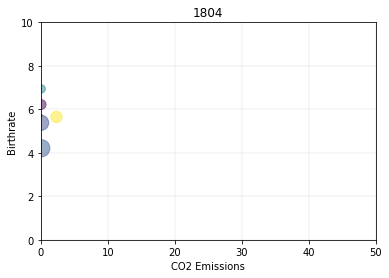

In [13]:
# Plot our data

x_axis = final_merge_1804_df["CO2 Emissions"]
y_axis = final_merge_1804_df["Birthrate"]

plt.xlabel("CO2 Emissions")
plt.ylabel("Birthrate")
plt.title("1804")
# plt.text(25, 9, r'Marker size = population', fontsize=8)
# plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(0,50)
plt.ylim(0,10)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1804_df['Income'],  
            alpha=0.5, s = final_merge_1804_df['Population']/scale_variable)

plt.savefig("1804.png", dpi=150)

plt.show()

In [14]:
# Repeat the above steps for the remaining years

In [15]:
# Creating df for 1834

first_merge_1834_df = pd.merge(co2_1834_df, birthrate_1834_df, on='country', how='inner')
first_merge_1834_df = first_merge_1834_df.dropna()
first_merge_1834_df = first_merge_1834_df.rename(columns={"country": "Country", "1834_x": "CO2 Emissions", "1834_y": "Birthrate"})

second_merge_1834_df = pd.merge(population_1834_df, income_1834_df, on='country', how='inner')
second_merge_1834_df = second_merge_1834_df.dropna()
second_merge_1834_df = second_merge_1834_df.rename(columns={"country": "Country", "1834_x": "Population", "1834_y": "Income"})

final_merge_1834_df = pd.merge(first_merge_1834_df, second_merge_1834_df, on='Country', how='inner')

final_merge_1834_df['Population Color'] = final_merge_1834_df['Population']/max_pop

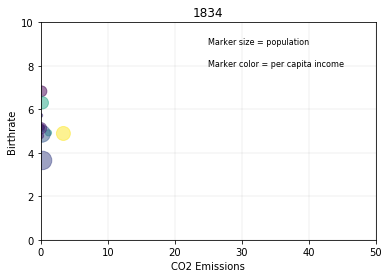

In [16]:
# Plotting 1834

x_axis = final_merge_1834_df["CO2 Emissions"]
y_axis = final_merge_1834_df["Birthrate"]

plt.xlabel("CO2 Emissions")
plt.ylabel("Birthrate")
plt.title("1834")
plt.text(25, 9, r'Marker size = population', fontsize=8)
plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(0,50)
plt.ylim(0,10)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1834_df['Income'],  
            alpha=0.5, s = final_merge_1834_df['Population']/scale_variable)

plt.savefig("1834.png", dpi=150)

plt.show()

In [17]:
# Create df for 1864

first_merge_1864_df = pd.merge(co2_1864_df, birthrate_1864_df, on='country', how='inner')
first_merge_1864_df = first_merge_1864_df.dropna()
first_merge_1864_df = first_merge_1864_df.rename(columns={"country": "Country", "1864_x": "CO2 Emissions", "1864_y": "Birthrate"})

second_merge_1864_df = pd.merge(population_1864_df, income_1864_df, on='country', how='inner')
second_merge_1864_df = second_merge_1864_df.dropna()
second_merge_1864_df = second_merge_1864_df.rename(columns={"country": "Country", "1864_x": "Population", "1864_y": "Income"})

final_merge_1864_df = pd.merge(first_merge_1864_df, second_merge_1864_df, on='Country', how='inner')

final_merge_1864_df['Population Color'] = final_merge_1864_df['Population']/max_pop

final_merge_1864_df.head()

,Country,CO2 Emissions,Birthrate,Population,Income,Population Color
0,Armenia,0.00258,8.00,618000,610,0.000445
1,Australia,0.18400,5.75,1460000,4800,0.001050
2,Austria,1.17000,4.94,4360000,3300,0.003137
3,Azerbaijan,0.01160,8.10,1320000,993,0.000950
4,Belarus,0.00676,7.00,3530000,793,0.002540


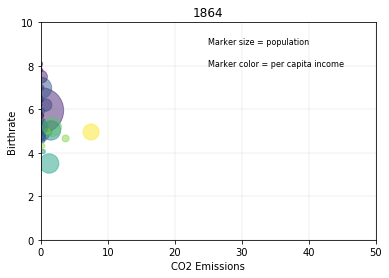

In [18]:
# Plot 1864

x_axis = final_merge_1864_df["CO2 Emissions"]
y_axis = final_merge_1864_df["Birthrate"]

plt.xlabel("CO2 Emissions")
plt.ylabel("Birthrate")
plt.title("1864")
plt.text(25, 9, r'Marker size = population', fontsize=8)
plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(0,50)
plt.ylim(0,10)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1864_df['Income'],  
            alpha=0.5, s = final_merge_1864_df['Population']/scale_variable)

plt.savefig("1864.png", dpi=150)

plt.show()

In [19]:
# Create df for 1894
first_merge_1894_df = pd.merge(co2_1894_df, birthrate_1894_df, on='country', how='inner')
first_merge_1894_df = first_merge_1894_df.dropna()
first_merge_1894_df = first_merge_1894_df.rename(columns={"country": "Country", "1894_x": "CO2 Emissions", "1894_y": "Birthrate"})

second_merge_1894_df = pd.merge(population_1894_df, income_1894_df, on='country', how='inner')
second_merge_1894_df = second_merge_1894_df.dropna()
second_merge_1894_df = second_merge_1894_df.rename(columns={"country": "Country", "1894_x": "Population", "1894_y": "Income"})

final_merge_1894_df = pd.merge(first_merge_1894_df, second_merge_1894_df, on='Country', how='inner')

final_merge_1894_df['Population Color'] = final_merge_1894_df['Population']/max_pop
final_merge_1894_df.head()

,Country,CO2 Emissions,Birthrate,Population,Income,Population Color
0,Argentina,0.5150,6.63,3880000,6420,0.002791
1,Armenia,0.0813,8.10,810000,840,0.000583
2,Australia,1.2900,4.13,3390000,6270,0.002439
3,Austria,3.2300,4.34,5620000,5160,0.004043
4,Azerbaijan,0.3650,8.10,1740000,1430,0.001252


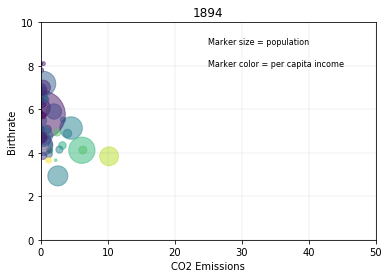

In [20]:
# Plot 1894
x_axis = final_merge_1894_df["CO2 Emissions"]
y_axis = final_merge_1894_df["Birthrate"]

plt.xlabel("CO2 Emissions")
plt.ylabel("Birthrate")
plt.title("1894")
plt.text(25, 9, r'Marker size = population', fontsize=8)
plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(0,50)
plt.ylim(0,10)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1894_df['Income'],  
            alpha=0.5, s = final_merge_1894_df['Population']/scale_variable)

plt.savefig("1894.png", dpi=150)

plt.show()

In [21]:
# Create df for 1924
first_merge_1924_df = pd.merge(co2_1924_df, birthrate_1924_df, on='country', how='inner')
first_merge_1924_df = first_merge_1924_df.dropna()
first_merge_1924_df = first_merge_1924_df.rename(columns={"country": "Country", "1924_x": "CO2 Emissions", "1924_y": "Birthrate"})

second_merge_1924_df = pd.merge(population_1924_df, income_1924_df, on='country', how='inner')
second_merge_1924_df = second_merge_1924_df.dropna()
second_merge_1924_df = second_merge_1924_df.rename(columns={"country": "Country", "1924_x": "Population", "1924_y": "Income"})

final_merge_1924_df = pd.merge(first_merge_1924_df, second_merge_1924_df, on='Country', how='inner')

final_merge_1924_df['Population Color'] = final_merge_1924_df['Population']/max_pop
final_merge_1924_df.head()

,Country,CO2 Emissions,Birthrate,Population,Income,Population Color
0,Algeria,0.0046,6.99,6380000,2600,0.004590
1,Argentina,1.0900,4.57,10100000,7970,0.007266
2,Armenia,0.0887,7.81,1060000,642,0.000763
3,Australia,4.6500,2.97,5830000,8910,0.004194
4,Austria,3.0600,2.99,6560000,6230,0.004719


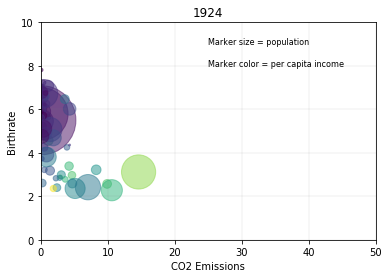

In [22]:
# Plot 1924
x_axis = final_merge_1924_df["CO2 Emissions"]
y_axis = final_merge_1924_df["Birthrate"]

plt.xlabel("CO2 Emissions")
plt.ylabel("Birthrate")
plt.title("1924")
plt.text(25, 9, r'Marker size = population', fontsize=8)
plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(0,50)
plt.ylim(0,10)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1924_df['Income'],  
            alpha=0.5, s = final_merge_1924_df['Population']/scale_variable)

plt.savefig("1924.png", dpi=150)

plt.show()

In [23]:
# Create df for 1954
first_merge_1954_df = pd.merge(co2_1954_df, birthrate_1954_df, on='country', how='inner')
first_merge_1954_df = first_merge_1954_df.dropna()
first_merge_1954_df = first_merge_1954_df.rename(columns={"country": "Country", "1954_x": "CO2 Emissions", "1954_y": "Birthrate"})

second_merge_1954_df = pd.merge(population_1954_df, income_1954_df, on='country', how='inner')
second_merge_1954_df = second_merge_1954_df.dropna()
second_merge_1954_df = second_merge_1954_df.rename(columns={"country": "Country", "1954_x": "Population", "1954_y": "Income"})

final_merge_1954_df = pd.merge(first_merge_1954_df, second_merge_1954_df, on='Country', how='inner')

final_merge_1954_df['Population Color'] = final_merge_1954_df['Population']/max_pop
final_merge_1954_df.head()

,Country,CO2 Emissions,Birthrate,Population,Income,Population Color
0,Afghanistan,0.0131,7.53,8150000,1130,0.005863
1,Albania,0.3630,6.37,1380000,2150,0.000993
2,Algeria,0.4330,7.41,9610000,4340,0.006914
3,Angola,0.0696,7.20,5000000,3290,0.003597
4,Argentina,1.9800,3.15,18600000,8180,0.013381


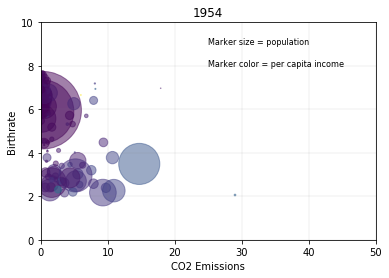

In [24]:
# Plot 1954
x_axis = final_merge_1954_df["CO2 Emissions"]
y_axis = final_merge_1954_df["Birthrate"]

plt.xlabel("CO2 Emissions")
plt.ylabel("Birthrate")
plt.title("1954")
plt.text(25, 9, r'Marker size = population', fontsize=8)
plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(0,50)
plt.ylim(0,10)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1954_df['Income'],  
            alpha=0.5, s = final_merge_1954_df['Population']/scale_variable)

plt.savefig("1954.png", dpi=150)

plt.show()

In [25]:
# Create df for 1984
first_merge_1984_df = pd.merge(co2_1984_df, birthrate_1984_df, on='country', how='inner')
first_merge_1984_df = first_merge_1984_df.dropna()
first_merge_1984_df = first_merge_1984_df.rename(columns={"country": "Country", "1984_x": "CO2 Emissions", "1984_y": "Birthrate"})

second_merge_1984_df = pd.merge(population_1984_df, income_1984_df, on='country', how='inner')
second_merge_1984_df = second_merge_1984_df.dropna()
second_merge_1984_df = second_merge_1984_df.rename(columns={"country": "Country", "1984_x": "Population", "1984_y": "Income"})

final_merge_1984_df = pd.merge(first_merge_1984_df, second_merge_1984_df, on='Country', how='inner')

final_merge_1984_df['Population Color'] = final_merge_1984_df['Population']/max_pop
final_merge_1984_df.head()

,Country,CO2 Emissions,Birthrate,Population,Income,Population Color
0,Afghanistan,0.235,7.46,12000000,1440,0.008633
1,Albania,2.700,3.32,2900000,4440,0.002086
2,Algeria,3.250,6.04,21900000,11100,0.015755
3,Angola,0.487,7.39,10300000,4240,0.007410
4,Antigua and Barbuda,2.070,2.10,70700,9960,0.000051


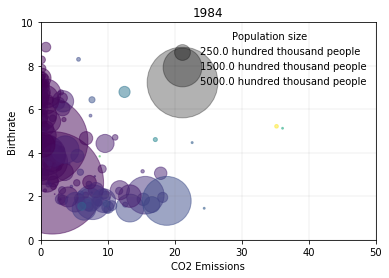

In [26]:
# Plot 1984 - this one demonstrates some different options for the plot
x_axis = final_merge_1984_df["CO2 Emissions"]
y_axis = final_merge_1984_df["Birthrate"]

plt.xlabel("CO2 Emissions")
plt.ylabel("Birthrate")
plt.title("1984")
# plt.text(25, 9, r'Marker size = population', fontsize=8)
# plt.text(25, 8, r'Marker color = per capita income', fontsize=8)


plt.xlim(0,50)
plt.ylim(0,10)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

for area in [25000000/scale_variable, 150000000/scale_variable, 500000000/scale_variable]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label = str(area) + ' hundred thousand people')
plt.legend(scatterpoints=1, frameon=False, labelspacing=.5, title='Population size')

plt.scatter(x_axis, y_axis, c=final_merge_1984_df['Income'],  
            alpha=0.5, s = final_merge_1984_df['Population']/scale_variable)

plt.savefig("1984.png", dpi=150)

plt.show()

In [27]:
# Create df for 2014
first_merge_2014_df = pd.merge(co2_2014_df, birthrate_2014_df, on='country', how='inner')
first_merge_2014_df = first_merge_2014_df.dropna()
first_merge_2014_df = first_merge_2014_df.rename(columns={"country": "Country", "2014_x": "CO2 Emissions", "2014_y": "Birthrate"})

second_merge_2014_df = pd.merge(population_2014_df, income_2014_df, on='country', how='inner')
second_merge_2014_df = second_merge_2014_df.dropna()
second_merge_2014_df = second_merge_2014_df.rename(columns={"country": "Country", "2014_x": "Population", "2014_y": "Income"})

final_merge_2014_df = pd.merge(first_merge_2014_df, second_merge_2014_df, on='Country', how='inner')


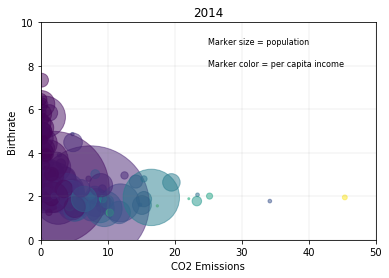

In [28]:
# Plot 2014
x_axis = final_merge_2014_df["CO2 Emissions"]
y_axis = final_merge_2014_df["Birthrate"]

plt.xlabel("CO2 Emissions")
plt.ylabel("Birthrate")
plt.title("2014")
plt.text(25, 9, r'Marker size = population', fontsize=8)
plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(0,50)
plt.ylim(0,10)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_2014_df['Income'],  
            alpha=0.5, s = final_merge_2014_df['Population']/scale_variable)

plt.savefig("2014.png", dpi=150)

plt.show()

In [29]:
# make a list of data points by year, and then graph those, because might as well

sample_list = [len(final_merge_1804_df), len(final_merge_1834_df), 
               len(final_merge_1864_df), len(final_merge_1894_df), 
               len(final_merge_1924_df), len(final_merge_1954_df),
              len(final_merge_1984_df), len(final_merge_2014_df)]

sample_list

[6, 11, 35, 47, 62, 137, 169, 184]

<BarContainer object of 8 artists>

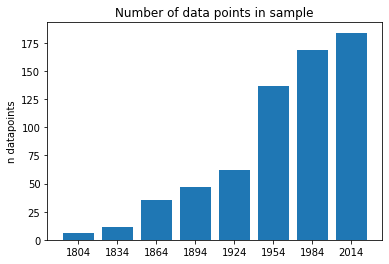

In [30]:
# Create a column chart of sample_list

bar_labels = ["1804", "1834", "1864", "1894", "1924", "1954", "1984", "2014"]

plt.ylabel("n datapoints")
plt.title("Number of data points in sample")

plt.bar(bar_labels, height=sample_list)

In [31]:
# After looking at these initial results, we were curious about some different relationships that might
# exist within our data. 

# As a result, we conducted an initial visual analysis, looking at the relationship between income and CO2. 
# Because the range of income was so large, we took the log value of income for our plot values. 

In [32]:
# Create a column of log values for population

final_merge_2014_df['Log Population'] = np.log10(final_merge_2014_df['Population'])
final_merge_1984_df['Log Population'] = np.log10(final_merge_1984_df['Population'])
final_merge_1954_df['Log Population'] = np.log10(final_merge_1954_df['Population'])
final_merge_1924_df['Log Population'] = np.log10(final_merge_1924_df['Population'])
final_merge_1894_df['Log Population'] = np.log10(final_merge_1894_df['Population'])
final_merge_1864_df['Log Population'] = np.log10(final_merge_1864_df['Population'])
final_merge_1834_df['Log Population'] = np.log10(final_merge_1834_df['Population'])
final_merge_1804_df['Log Population'] = np.log10(final_merge_1804_df['Population'])

final_merge_2014_df.head()

,Country,CO2 Emissions,Birthrate,Population,Income,Log Population
0,Afghanistan,0.299,4.98,32800000,1780,7.515874
1,Albania,1.960,1.71,2920000,10700,6.465383
2,Algeria,3.720,2.89,39100000,13500,7.592177
3,Angola,1.290,5.84,26900000,6260,7.429752
4,Antigua and Barbuda,5.380,2.08,98900,19500,4.995196


In [34]:
# Create a column of log values for income

final_merge_2014_df['Log Income'] = np.log10(final_merge_2014_df['Income'])
final_merge_1984_df['Log Income'] = np.log10(final_merge_1984_df['Income'])
final_merge_1954_df['Log Income'] = np.log10(final_merge_1954_df['Income'])
final_merge_1924_df['Log Income'] = np.log10(final_merge_1924_df['Income'])
final_merge_1894_df['Log Income'] = np.log10(final_merge_1894_df['Income'])
final_merge_1864_df['Log Income'] = np.log10(final_merge_1864_df['Income'])
final_merge_1834_df['Log Income'] = np.log10(final_merge_1834_df['Income'])
final_merge_1804_df['Log Income'] = np.log10(final_merge_1804_df['Income'])


final_merge_2014_df.head()

,Country,CO2 Emissions,Birthrate,Population,Income,Log Population,Log Income
0,Afghanistan,0.299,4.98,32800000,1780,7.515874,3.250420
1,Albania,1.960,1.71,2920000,10700,6.465383,4.029384
2,Algeria,3.720,2.89,39100000,13500,7.592177,4.130334
3,Angola,1.290,5.84,26900000,6260,7.429752,3.796574
4,Antigua and Barbuda,5.380,2.08,98900,19500,4.995196,4.290035


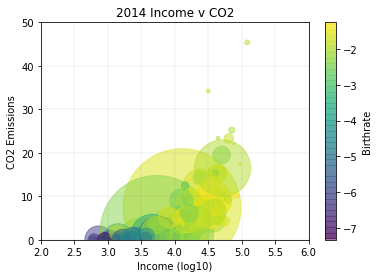

In [35]:
# Create a test plot to see what the relationship between income and CO2 may be

# Testing how income impacts CO2
x_axis = final_merge_2014_df["Log Income"]
y_axis = final_merge_2014_df["CO2 Emissions"]

plt.xlabel("Income (log10)")
plt.ylabel("CO2 Emissions")
plt.title("2014 Income v CO2")
#plt.text(25, 9, r'Marker size = population', fontsize=8)
#plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(2, 6)
plt.ylim(0,50)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_2014_df['Birthrate']*-1,  
            alpha=0.5, s = final_merge_2014_df['Population']/scale_variable)

#cax = divider.append_axes('right', size='5%', pad=0.05)
#im = ax.imshow(data, cmap='bone')

plt.colorbar(orientation='vertical', label="Birthrate")

plt.savefig("2014 Income.png", dpi=150)

plt.show()

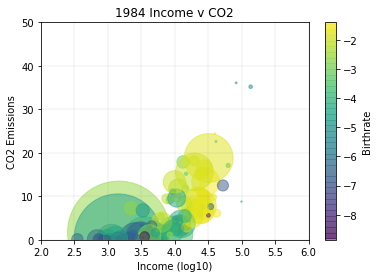

In [36]:
# Testing how income impacts CO2
x_axis = final_merge_1984_df["Log Income"]
y_axis = final_merge_1984_df["CO2 Emissions"]

plt.xlabel("Income (log10)")
plt.ylabel("CO2 Emissions")
plt.title("1984 Income v CO2")
#plt.text(25, 9, r'Marker size = population', fontsize=8)
#plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(2, 6)
plt.ylim(0,50)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1984_df['Birthrate']*-1,  
            alpha=0.5, s = final_merge_1984_df['Population']/scale_variable)

plt.colorbar(orientation='vertical', label="Birthrate")

plt.savefig("1984 Income.png", dpi=150)

plt.show()

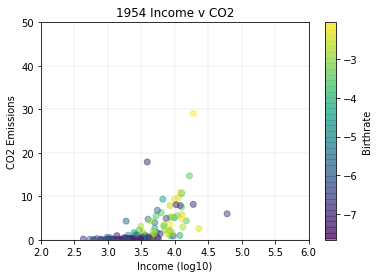

In [38]:
# This chart, we decided to explore how not sizing the bubbles by population might change the readability of the graph

# Testing how income impacts CO2
x_axis = final_merge_1954_df["Log Income"]
y_axis = final_merge_1954_df["CO2 Emissions"]

plt.xlabel("Income (log10)")
plt.ylabel("CO2 Emissions")
plt.title("1954 Income v CO2")
#plt.text(25, 9, r'Marker size = population', fontsize=8)
#plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(2, 6)
plt.ylim(0,50)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1954_df['Birthrate']*-1,  
            alpha=0.5) #, s = final_merge_1954_df['Population']/scale_variable)

plt.colorbar(orientation='vertical', label="Birthrate")

plt.savefig("1954 Income.png", dpi=150)

plt.show()

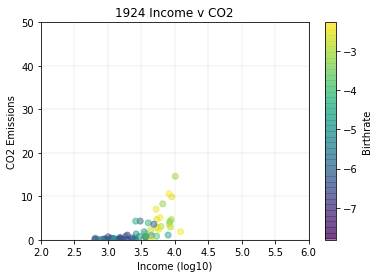

In [39]:
# Testing how income impacts CO2
x_axis = final_merge_1924_df["Log Income"]
y_axis = final_merge_1924_df["CO2 Emissions"]

plt.xlabel("Income (log10)")
plt.ylabel("CO2 Emissions")
plt.title("1924 Income v CO2")
#plt.text(25, 9, r'Marker size = population', fontsize=8)
#plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(2, 6)
plt.ylim(0,50)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1924_df['Birthrate']*-1,  
            alpha=0.5) #, s = final_merge_1924_df['Population']/scale_variable)

plt.colorbar(orientation='vertical', label="Birthrate")

plt.savefig("1924 Income.png", dpi=150)

plt.show()

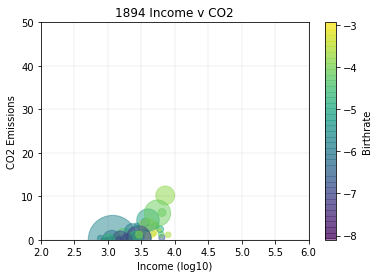

In [40]:
# Testing how income impacts CO2
x_axis = final_merge_1894_df["Log Income"]
y_axis = final_merge_1894_df["CO2 Emissions"]

plt.xlabel("Income (log10)")
plt.ylabel("CO2 Emissions")
plt.title("1894 Income v CO2")
#plt.text(25, 9, r'Marker size = population', fontsize=8)
#plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(2, 6)
plt.ylim(0,50)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1894_df['Birthrate']*-1,  
            alpha=0.5, s = final_merge_1894_df['Population']/scale_variable)

plt.colorbar(orientation='vertical', label="Birthrate")

plt.savefig("1894 Income.png", dpi=150)

plt.show()

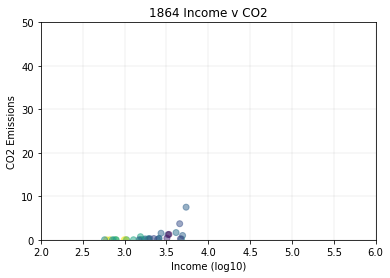

In [41]:
# Testing how income impacts CO2
x_axis = final_merge_1864_df["Log Income"]
y_axis = final_merge_1864_df["CO2 Emissions"]

plt.xlabel("Income (log10)")
plt.ylabel("CO2 Emissions")
plt.title("1864 Income v CO2")
#plt.text(25, 9, r'Marker size = population', fontsize=8)
#plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(2, 6)
plt.ylim(0,50)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1864_df['Birthrate']*100,  
            alpha=0.5) #, s = final_merge_1864_df['Population']/scale_variable)

plt.savefig("1864 Income.png", dpi=150)

plt.show()

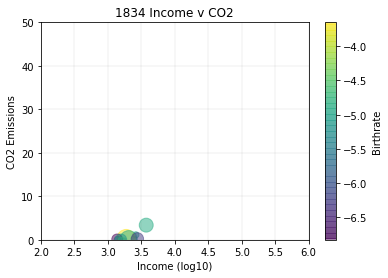

In [42]:
# Testing how income impacts CO2
x_axis = final_merge_1834_df["Log Income"]
y_axis = final_merge_1834_df["CO2 Emissions"]

plt.xlabel("Income (log10)")
plt.ylabel("CO2 Emissions")
plt.title("1834 Income v CO2")
#plt.text(25, 9, r'Marker size = population', fontsize=8)
#plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(2, 6)
plt.ylim(0,50)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1834_df['Birthrate']*-1,  
            alpha=0.5, s = final_merge_1834_df['Population']/scale_variable)

plt.colorbar(orientation='vertical', label="Birthrate")

plt.savefig("1834 Income.png", dpi=150)

plt.show()

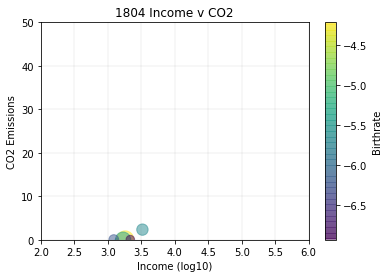

In [43]:
# Testing how income impacts CO2
x_axis = final_merge_1804_df["Log Income"]
y_axis = final_merge_1804_df["CO2 Emissions"]

plt.xlabel("Income (log10)")
plt.ylabel("CO2 Emissions")
plt.title("1804 Income v CO2")
#plt.text(25, 9, r'Marker size = population', fontsize=8)
#plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

plt.xlim(2, 6)
plt.ylim(0,50)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, c=final_merge_1804_df['Birthrate']*-1,  
            alpha=0.5, s = final_merge_1804_df['Population']/scale_variable)

plt.colorbar(orientation='vertical', label="Birthrate")

plt.savefig("1804 Income.png", dpi=150)

plt.show()

In [44]:
# We then wondered if looking at individual countries might tell other aspects of the story

In [45]:
# Figure out how to track a single country over time
# Swap columns and rows
co2_country_df = co2_df.T

# Set column names as the country names
co2_country_df.columns = co2_country_df.iloc[0]

# Remove the country row
co2_japan_df = co2_country_df.drop('country')

# Verify results
co2_country_df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.16,0.0372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.14,0.0386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.13,0.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.36,0.0412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Figure out how to track a single country over time
# Swap columns and rows
income_country_df = income_df.T

# Set column names as the country names
income_country_df.columns = income_country_df.iloc[0]

# Remove the country row
income_country_df = income_country_df.drop('country')

# Verify results
income_country_df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800,603,667,715,1200,618,757,1510,514,814,1850,...,3430,2130,1760,502,585,682,861,877,663,869
1801,603,667,716,1200,620,757,1510,514,816,1850,...,3440,2170,1760,502,586,682,861,879,665,870
1802,603,667,717,1200,623,757,1510,514,818,1860,...,3450,2200,1760,502,586,682,861,882,667,871
1803,603,667,718,1200,626,757,1510,514,820,1870,...,3340,2170,1760,502,586,682,861,884,668,872
1804,603,667,719,1210,628,757,1510,514,822,1880,...,3290,2170,1760,503,586,682,861,887,670,873


In [47]:
# Figure out how to track a single country over time
# Swap columns and rows
birthrate_country_df = birthrate_df.T

# Set column names as the country names
birthrate_country_df.columns = birthrate_country_df.iloc[0]

birthrate_country_df = birthrate_country_df.drop('country')

# Verify results
birthrate_country_df.head()

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800,7,4.6,6.99,6.93,5,6.8,7.8,6.5,5.1,8.1,...,4.97,7.03,5.97,5.71,6.6,5.63,4.7,6.88,6.71,6.75
1801,7,4.6,6.99,6.93,5,6.8,7.8,6.48,5.1,8.1,...,4.6,7.01,5.97,5.71,6.6,5.63,4.7,6.88,6.71,6.75
1802,7,4.6,6.99,6.93,4.99,6.8,7.81,6.46,5.1,8.1,...,5.3,6.99,5.96,5.71,6.6,5.64,4.7,6.88,6.71,6.75
1803,7,4.6,6.99,6.93,4.99,6.8,7.81,6.44,5.1,8.1,...,5.61,6.96,5.96,5.71,6.6,5.64,4.7,6.88,6.71,6.75
1804,7,4.6,6.99,6.93,4.99,6.8,7.81,6.42,5.1,8.1,...,5.65,6.94,5.96,5.71,6.6,5.64,4.7,6.88,6.71,6.75


In [48]:
# Figure out how to track a single country over time
# Swap columns and rows
population_country_df = population_df.T

# Set column names as the country names
population_country_df.columns = population_country_df.iloc[0]

population_country_df = population_country_df.drop('country')

# Verify results
population_country_df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800,3280000,410000,2500000,2650,1570000,37000,534000,413000,351000,3210000,...,12300000,6800000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1801,3280000,412000,2510000,2650,1570000,37000,534000,413000,350000,3210000,...,12500000,6930000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1802,3280000,413000,2520000,2650,1570000,37000,534000,413000,349000,3220000,...,12600000,7070000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1803,3280000,414000,2530000,2650,1570000,37000,534000,413000,348000,3230000,...,12800000,7200000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1804,3280000,416000,2540000,2650,1570000,37000,534000,413000,348000,3240000,...,13000000,7340000,55000,1920000,27800,718000,6550000,2590000,747000,1090000


In [49]:
# Get the CO2 values for a country
co2_japan_df = co2_country_df.loc[:, ['Japan']]

# Reset the index
co2_japan_df = co2_japan_df.reset_index(drop=False)

# Rename the columns
co2_japan_df = co2_japan_df.rename(columns = {"country": "Index", "index": "Country"})

co2_japan_df

country,Country,Japan
0,country,Japan
1,1800,NaN
2,1801,NaN
3,1802,NaN
4,1803,NaN
...,...,...
211,2010,9.11
212,2011,9.27
213,2012,9.58
214,2013,9.71


In [50]:
# Get the income values for a country
income_japan_df = income_country_df.loc[:, ['Japan']]

# Reset the index
income_japan_df = income_japan_df.reset_index(drop=False)

# Rename the columns
income_japan_df = income_japan_df.rename(columns = {"country": "Index", "index": "Country"})

income_japan_df

country,Country,Japan
0,1800,1050
1,1801,1050
2,1802,1050
3,1803,1050
4,1804,1060
...,...,...
236,2036,54300
237,2037,55500
238,2038,56700
239,2039,57900


In [53]:
# Merge dataframes together
japan_df = pd.merge(income_japan_df, co2_japan_df, on='Country', how='inner')
japan_df = japan_df.rename(columns = {"country": "Index", "Country": "Year", "Japan_x": "Income", "Japan_y": "CO2 Emissions"})
japan_df = japan_df.dropna()
#japan_df = japan_df.drop(0)
japan_df

country,Year,Income,CO2 Emissions
68,1868,1200,0.00032
69,1869,1210,0.00053
70,1870,1210,0.00053
71,1871,1220,0.00074
72,1872,1220,0.00094
...,...,...,...
210,2010,35800,9.11
211,2011,35800,9.27
212,2012,36400,9.58
213,2013,37100,9.71


In [52]:
# Get the birthrate values for a country
birthrate_japan_df = birthrate_country_df.loc[:, ['Japan']]

# Remove the country row
# birthrate_japan_df = birthrate_japan_df.drop('country')

# Reset the index
birthrate_japan_df = birthrate_japan_df.reset_index(drop=False)

# Rename columns
birthrate_japan_df = birthrate_japan_df.rename(columns = {"index": "Year", "Japan": "Birthrate"})

# Verify results
birthrate_japan_df.head()

country,Year,Birthrate
0,1800,4.08
1,1801,4.11
2,1802,4.14
3,1803,4.17
4,1804,4.2


In [54]:
# Get the population values for a country
population_japan_df = population_country_df.loc[:, ['Japan']]

# Remove the country row
# birthrate_japan_df = birthrate_japan_df.drop('country')

# Reset the index
population_japan_df = population_japan_df.reset_index(drop=False)

# Rename columns
population_japan_df = population_japan_df.rename(columns = {"index": "Year", "Japan": "Population"})

# Verify results
population_japan_df.head()

country,Year,Population
0,1800,30300000
1,1801,30300000
2,1802,30400000
3,1803,30400000
4,1804,30400000


In [55]:
# Complete the second merge
japan2_df = pd.merge(birthrate_japan_df, population_japan_df, on='Year', how='inner')
japan2_df = japan2_df.rename(columns = {"country": "Index", "Country": "Year", "United States_x": "Income", "United States_y": "CO2 Emissions"})
japan2_df = japan2_df.dropna()
# japan_df = japan_df.drop(0)
japan2_df

country,Year,Birthrate,Population
0,1800,4.08,30300000
1,1801,4.11,30300000
2,1802,4.14,30400000
3,1803,4.17,30400000
4,1804,4.2,30400000
...,...,...,...
214,2014,1.43,128000000
215,2015,1.44,128000000
216,2016,1.46,128000000
217,2017,1.47,127000000


In [56]:
# Complete final merge
japan_final_df = pd.merge(japan_df, japan2_df, on='Year', how='inner')

japan_final_df = japan_final_df.dropna()

japan_final_df

country,Year,Income,CO2 Emissions,Birthrate,Population
0,1868,1200,0.00032,4.13,34400000
1,1869,1210,0.00053,3.98,34500000
2,1870,1210,0.00053,3.84,34700000
3,1871,1220,0.00074,3.7,34900000
4,1872,1220,0.00094,3.56,35100000
...,...,...,...,...,...
142,2010,35800,9.11,1.37,129000000
143,2011,35800,9.27,1.39,129000000
144,2012,36400,9.58,1.4,128000000
145,2013,37100,9.71,1.42,128000000


In [57]:
# Change the data types to a non-string
japan_final_df = japan_final_df.astype({"Population": float, "Income": float})

japan_final_df.dtypes

country
Year              object
Income           float64
CO2 Emissions     object
Birthrate         object
Population       float64
dtype: object

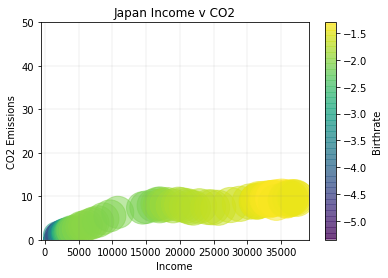

In [58]:
# Testing how income impacts CO2
x_axis = japan_df["Income"]
y_axis = japan_df["CO2 Emissions"]

plt.xlabel("Income")
plt.ylabel("CO2 Emissions")
plt.title("Japan Income v CO2")
#plt.text(25, 9, r'Marker size = population', fontsize=8)
#plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

#plt.xlim(2, 6)
plt.ylim(0,50)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
plt.scatter(x_axis, y_axis, alpha = .5, c=japan_final_df['Birthrate']*-1,
            s = japan_final_df['Population']/scale_variable)

plt.colorbar(orientation='vertical', label="Birthrate")

plt.savefig("Japan.png", dpi=150)

plt.show()

In [59]:
# Get the values for a country
co2_china_df = co2_country_df.loc[:, ['China']]
income_china_df = income_country_df.loc[:, ['China']]
birthrate_china_df = birthrate_country_df.loc[:, ['China']]
population_china_df = population_country_df.loc[:, ['China']]

# Remove the country row
#co2_usa_df = co2_usa_df.drop('country')
#income_usa_df = income_usa_df.drop('country')

# Reset the index
co2_china_df = co2_china_df.reset_index(drop=False)
income_china_df = income_china_df.reset_index(drop=False)
birthrate_china_df = birthrate_china_df.reset_index(drop=False)
population_china_df = population_china_df.reset_index(drop=False)

# Rename columns
co2_china_df = co2_china_df.rename(columns = {"index": "Year", "China": "CO2 Emissions"})
income_china_df = income_china_df.rename(columns = {"index": "Year", "China": "Income"})
birthrate_china_df = birthrate_china_df.rename(columns = {"index": "Year", "China": "Birthrate"})
population_china_df = population_china_df.rename(columns = {"index": "Year", "China": "Population"})

# Verify results
co2_china_df.head()
income_china_df.head()
birthrate_china_df.head()
population_china_df.head()

country,Year,Population
0,1800,322000000
1,1801,324000000
2,1802,327000000
3,1803,330000000
4,1804,333000000


In [60]:
# Complete the merges
china_df = pd.merge(income_china_df, co2_china_df, on='Year', how='inner')
china_df = china_df.rename(columns = {"country": "Index", "Country": "Year", "United States_x": "Income", "United States_y": "CO2 Emissions"})
china_df = china_df.dropna()
china_df

china2_df = pd.merge(birthrate_china_df, population_china_df, on='Year', how='inner')
china2_df = china2_df.rename(columns = {"country": "Index", "Country": "Year", "United States_x": "Income", "United States_y": "CO2 Emissions"})
china2_df = china2_df.dropna()
china2_df

china_final_df = pd.merge(china_df, china2_df, on='Year', how='inner')
china_final_df = china_final_df.dropna()
china_final_df

country,Year,Income,CO2 Emissions,Birthrate,Population
0,1899,881,0.00024,5.5,399000000
1,1902,922,0.00024,5.5,405000000
2,1903,916,0.00483,5.5,407000000
3,1904,935,0.0051,5.5,410000000
4,1905,855,0.00558,5.5,412000000
...,...,...,...,...,...
109,2010,9530,6.45,1.59,1360000000
110,2011,10400,7.12,1.59,1370000000
111,2012,11100,7.29,1.6,1380000000
112,2013,12000,7.42,1.6,1380000000


In [61]:
# Reset the datatypes
# Change the data types to a non-string
china_final_df = china_final_df.astype({"Population": float, "Income": float, "Birthrate": float, "CO2 Emissions": float})

china_final_df.dtypes

country
Year              object
Income           float64
CO2 Emissions    float64
Birthrate        float64
Population       float64
dtype: object

In [62]:
# We can also test other relationships by country

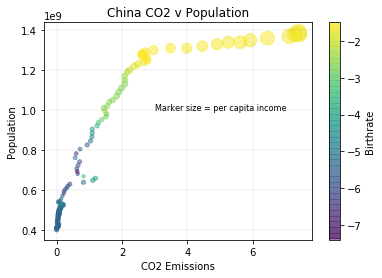

In [65]:
# Run the chart
# Testing how income impacts CO2
x_axis = china_final_df["CO2 Emissions"]
y_axis = china_final_df["Population"]

plt.xlabel("CO2 Emissions")
plt.ylabel("Population")
plt.title("China CO2 v Population")
plt.text(3, 1000000000, r'Marker size = per capita income', fontsize=8)
#plt.text(25, 8, r'Marker color = per capita income', fontsize=8)

#plt.xlim(0, 50)
#plt.ylim(0,50)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.scatter(x_axis, y_axis, alpha = .5, c = china_final_df['Birthrate']*-1,
            s = china_final_df['Income']/50)

plt.colorbar(orientation='vertical', label="Birthrate")

plt.savefig("China.png", dpi=150)

plt.show()

In [ ]:
#Bernt's code ends here

In [ ]:
#Molly's code starts here

In [ ]:
# reshape the income dataframe to show every Country|Year with the income for that year (using group by looked nice but didn't cut it) 
df_meltInc =income_df.melt(id_vars=['country'], var_name='year', value_name='income')
df_meltInc = df_meltInc.dropna()
df_meltInc

In [ ]:
# take the reshaped income values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltInc['combined'] = df_meltInc[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltInc

In [ ]:
# reshape the income dataframe to show every Country|Year with the income for that year (using group by looked nice but didn't cut it) 
df_meltCO2 =income_df.melt(id_vars=['country'], var_name='year', value_name='co2')
df_meltCO2 = df_meltCO2.dropna()
df_meltCO2

In [ ]:
# take the reshaped co2 values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltCO2['combined'] = df_meltInc[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltCO2

In [ ]:
# merge the reshaped income and co2
merge_inc_co2_df = pd.merge(df_meltInc,df_meltCO2, on="combined", how="inner")
merge_inc_co2_df = merge_inc_co2_df.drop('country_x', axis=1)
merge_inc_co2_df = merge_inc_co2_df.drop('year_x', axis=1)
merge_inc_co2_df = merge_inc_co2_df.drop('country_y', axis=1)
merge_inc_co2_df = merge_inc_co2_df.drop('year_y', axis=1)
merge_inc_co2_df

In [ ]:
# get the log of the income so the span of the plot isn't so wide
merge_inc_co2_df['log income'] = np.log10(merge_inc_co2_df['income'])
merge_inc_co2_df.head()

In [ ]:
# plot the log of the income and the co2 to see if there was correlation
x_axis = merge_inc_co2_df["log income"]
y_axis = merge_inc_co2_df["co2"]
plt.xlabel("Log Income")
plt.ylabel("CO2 Emissions")
plt.title("Impact of Income on CO2 Emissions 1800 to 2014")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.scatter(x_axis, y_axis, alpha=0.5, s=10)
plt.savefig(os.path.join("Images", "ImpactIncomeOnCO2.png"))
plt.show()

In [ ]:
print(merge_inc_co2_df['income'].mean())
print(merge_inc_co2_df['income'].median())
print(merge_inc_co2_df['income'].mode())

In [ ]:
print(merge_inc_co2_df['co2'].mean())
print(merge_inc_co2_df['co2'].median())
print(merge_inc_co2_df['co2'].mode())

In [ ]:
# Determine if the co2 emissions is normally distributed
plt.hist(merge_inc_co2_df['co2'])
plt.xlabel('co2')
plt.ylabel('Counts')
plt.show()
print(stats.normaltest(merge_inc_co2_df["co2"].sample(100)))

In [ ]:
# reshape the population dataframe to show every Country|Year with the population for that year (using group by looked nice but didn't cut it) 
df_meltPop = population_df.melt(id_vars=['country'], var_name='year', value_name='population')
df_meltPop = df_meltPop.dropna()
df_meltPop

In [ ]:
# take the reshaped population values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltPop['combined'] = df_meltPop[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltPop

In [ ]:
# reshape the birthrate dataframe to show every Country|Year with the birthrate for that year (using group 
# by looked nice but didn't cut it) 
df_meltBirth = birthrate_df.melt(id_vars=['country'], var_name='year', value_name='birth rate')
df_meltBirth = df_meltBirth.dropna()
df_meltBirth

In [ ]:
# take the reshaped birth rate values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltBirth['combined'] = df_meltBirth[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltBirth

In [ ]:
# merge the reshaped population and birth rate
merge_pop_birth_df = pd.merge(df_meltPop,df_meltBirth, on="combined", how="inner")
merge_pop_birth_df = merge_pop_birth_df.drop('country_x', axis=1)
merge_pop_birth_df = merge_pop_birth_df.drop('year_x', axis=1)
merge_pop_birth_df = merge_pop_birth_df.drop('country_y', axis=1)
merge_pop_birth_df = merge_pop_birth_df.drop('year_y', axis=1)
merge_pop_birth_df

In [ ]:
# merge the income/co2 dataframe to the population/birth rate dataframe
merge_all_df = pd.merge(merge_pop_birth_df,merge_inc_co2_df, on="combined", how="inner")
merge_all_df

In [ ]:
# plot the birth rate and the population to see if there was correlation
x_axis = merge_all_df["birth rate"]
y_axis = merge_all_df["population"]
plt.xlabel("Birth Rate")
plt.ylabel("Population")
plt.title("Impact of Birth Rate on Population 1800 to 2014")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.scatter(x_axis, y_axis, alpha=0.5, s=10)
plt.savefig(os.path.join("Images","ImpactBirthOnPop.png"))
plt.show()

In [ ]:
# merge the reshaped birth rate and co2
merge_birth_co2_df = pd.merge(df_meltBirth, df_meltCO2, on="combined", how="inner")
merge_birth_co2_df = merge_birth_co2_df.drop('country_x', axis=1)
merge_birth_co2_df = merge_birth_co2_df.drop('year_x', axis=1)
merge_birth_co2_df = merge_birth_co2_df.drop('country_y', axis=1)
merge_birth_co2_df = merge_birth_co2_df.drop('year_y', axis=1)
merge_birth_co2_df

In [ ]:
# plot the CO2 and birth rate to see if there was correlation
x_values = merge_birth_co2_df["co2"]
y_values = merge_birth_co2_df["birth rate"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (tons/person)")
plt.ylabel("Birthrate (child/woman)")
plt.savefig(os.path.join("Images","ImpactBirthOnPop.png"))
plt.title("CO2 Emissions v Birthrate (1800 - 2014)")

In [ ]:
# perform a linear regression on co2 v birthrate 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

In [ ]:
# create plot (co2 v birthrate)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (1800-2014)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save plot to images folder
plt.savefig(os.path.join("Images","allYears_co2_v_birthrate.png"))

# show plot
plt.show()

In [ ]:
#Molly's code ends here

In [ ]:
#Kaan's code starts here

In [ ]:
#Kaan's code ends here

In [ ]:
#Vallie's code starts here

In [ ]:
# print out the birthrate df
birthrate_df.head()

In [ ]:
# print out the co2 dataframe
co2_df.head()

In [ ]:
# merge birthrate and co2 dataframes on country
co2_br_merge = pd.merge(co2_df, birthrate_df, on="country")
co2_br_merge.head()

In [ ]:
# rename columns
co2_br_rename = co2_br_merge.rename(columns={"country": "Country",
                                             "1974_x": "1974 CO2 Emissions",
                                             "1984_x": "1984 CO2 Emissions",
                                             "1994_x": "1994 CO2 Emissions",
                                             "2004_x": "2004 CO2 Emissions",
                                             "2014_x": "2014 CO2 Emissions",
                                             "1974_y": "Birthrate_1974",
                                             "1984_y": "Birthrate_1984",
                                             "1994_y": "Birthrate_1994",
                                             "2004_y": "Birthrate_2004",
                                             "2014_y": "Birthrate_2014"})

# make df with only the columns we want to keep
co2_br_df = co2_br_rename[["Country", "1974 CO2 Emissions", "1984 CO2 Emissions", "1994 CO2 Emissions", "2004 CO2 Emissions", "2014 CO2 Emissions",
                           "Birthrate_1974", "Birthrate_1984", "Birthrate_1994", "Birthrate_2004", "Birthrate_2014"]]
co2_br_df.head()

In [ ]:
# create 1974 dataframe, co2 descending order
df_1974 = co2_br_df[["Country", "1974 CO2 Emissions", "Birthrate_1974"]].sort_values("1974 CO2 Emissions", ascending=False).reset_index()
df_1974 = df_1974[["Country", "1974 CO2 Emissions", "Birthrate_1974"]]

# drop rows with nan values
df_1974 = df_1974.dropna()
df_1974

In [ ]:
# run linear regression on co2 v birthrate (year 1974)

# first create scatter plot
x_values = df_1974["1974 CO2 Emissions"]
y_values = df_1974["Birthrate_1974"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (tons/person)")
plt.ylabel("Birthrate (child/woman)")
plt.title("CO2 Emissions v Birthrate (1974)")

In [ ]:
# perform a linear regression on co2 v birthrate (year 1974)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

In [ ]:
# create plot (co2 v birthrate, 1974)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (1974)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save plot to images folder
plt.savefig(os.path.join("Images","1974_co2_v_birthrate.png"))

# show plot
plt.show()

In [ ]:
# create 1984 dataframe, co2 descending order
df_1984 = co2_br_df[["Country", "1984 CO2 Emissions", "Birthrate_1984"]].sort_values("1984 CO2 Emissions", ascending=False).reset_index()
df_1984 = df_1984[["Country", "1984 CO2 Emissions", "Birthrate_1984"]]

# drop rows with nan values
df_1984 = df_1984.dropna()
df_1984.head()

In [ ]:
# run linear regression on co2 v birthrate (year 1984)

# first create scatter plot
x_values = df_1984["1984 CO2 Emissions"]
y_values = df_1984["Birthrate_1984"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (tons/person)")
plt.ylabel("Birthrate (child/woman)")
plt.title("CO2 Emissions v Birthrate (1984)")

In [ ]:
# perform a linear regression on co2 v birthrate (year 1984)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

In [ ]:
# create plot (co2 v birthrate, 1984)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (1984)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save plot to images folder
plt.savefig(os.path.join("Images","1984_co2_v_birthrate.png"))

# show plot
plt.show()

In [ ]:
# create 1994 dataframe, co2 descending order
df_1994 = co2_br_df[["Country", "1994 CO2 Emissions", "Birthrate_1994"]].sort_values("1994 CO2 Emissions", ascending=False).reset_index()
df_1994 = df_1994[["Country", "1994 CO2 Emissions", "Birthrate_1994"]]

# drop rows with nan values
df_1994 = df_1994.dropna()
df_1994.head()

In [ ]:
# run linear regression on co2 v birthrate (year 1994)

# first create scatter plot
x_values = df_1994["1994 CO2 Emissions"]
y_values = df_1994["Birthrate_1994"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (tons/person)")
plt.ylabel("Birthrate (child/woman)")
plt.title("CO2 Emissions v Birthrate (1994)")

In [ ]:
# perform a linear regression on co2 v birthrate (year 1994)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

In [ ]:
# create plot (co2 v birthrate, 1994)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel("CO2 Emissions")
plt.ylabel("Birthrate")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (1994)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save plot to images folder
plt.savefig(os.path.join("Images","1994_co2_v_birthrate.png"))

# show plot
plt.show()

In [ ]:
# create 2004 dataframe, co2 descending order
df_2004 = co2_br_df[["Country", "2004 CO2 Emissions", "Birthrate_2004"]].sort_values("2004 CO2 Emissions", ascending=False).reset_index()
df_2004 = df_2004[["Country", "2004 CO2 Emissions", "Birthrate_2004"]]

# drop rows with nan values
df_2004 = df_2004.dropna()
df_2004.head()

In [ ]:
# run linear regression on co2 v birthrate (year 2004)

# first create scatter plot
x_values = df_2004["2004 CO2 Emissions"]
y_values = df_2004["Birthrate_2004"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (tons/person)")
plt.ylabel("Birthrate (child/woman)")
plt.title("CO2 Emissions v Birthrate (2004)")

In [ ]:
# perform a linear regression on co2 v birthrate (year 2004)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

In [ ]:
# create plot (co2 v birthrate, 2004)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (2004)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save plot to images folder
plt.savefig(os.path.join("Images","2004_co2_v_birthrate.png"))

# show plot
plt.show()

In [ ]:
# create 2014 dataframe, co2 descending order
df_2014 = co2_br_df[["Country", "2014 CO2 Emissions", "Birthrate_2014"]].sort_values("2014 CO2 Emissions", ascending=False).reset_index()
df_2014 = df_2014[["Country", "2014 CO2 Emissions", "Birthrate_2014"]]

# drop rows with nan values
df_2014 = df_2014.dropna()
df_2014.head()

In [ ]:
# run linear regression on co2 v birthrate (year 2014)

# first create scatter plot
x_values = df_2014["2014 CO2 Emissions"]
y_values = df_2014["Birthrate_2014"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (tons/person)")
plt.ylabel("Birthrate (child/woman)")
plt.title("CO2 Emissions v Birthrate (2014)")

In [ ]:
# perform a linear regression on co2 v birthrate (year 2014)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

In [ ]:
# create plot (co2 v birthrate, 2014)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (2014)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save plot to images folder
plt.savefig(os.path.join("Images","2014_co2_v_birthrate.png"))

# show plot
plt.show()

**ANALYSIS:**   Based off of linear regression alone, there doesn't appear to be a statistically significant correlation between co2 and birthrate, over any of the years Kaan and I looked at. Could it be of significance that 4 of the 5 years I tested had an r-value that fell within a .058 window of each other? 1974 was the farthest away from the rest, with an r-value of -.28, classified as a weak correlation (the rest fell under a 'moderate' correlation).

In [ ]:
# running anova and independent t-tests (1974 co2 v birthrate)

# create bins to place the carbon emissions
bins = [0, 22.72, 45.46, 69]

# create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

# slice the data and place it into bins
pd.cut(df_1974["1974 CO2 Emissions"], bins, labels=group_labels)

# place the data series into a new column inside of the dataframe
df_1974["CO2 Group"] = pd.cut(df_1974["1974 CO2 Emissions"], bins, labels=group_labels)
df_1974.head()

In [ ]:
# anova (co2 v birthrate, 1974)

# create a boxplot to compare means
df_1974.boxplot("Birthrate_1974", by="CO2 Group", figsize=(20, 10))

In [ ]:
# extract individual groups
group1 = df_1974[df_1974["CO2 Group"] == "Low-Level CO2"]["Birthrate_1974"]
group2 = df_1974[df_1974["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1974"]
group3 = df_1974[df_1974["CO2 Group"] == "High-Level CO2"]["Birthrate_1974"]

# perform the anova
stats.f_oneway(group1, group2, group3)

In [ ]:
# independent t-test

# calculate the 'population' mean for birthrate in lowest co2 group (year 1974)
population1 = df_1974[df_1974["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1974.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 1974)
population2 = df_1974[df_1974["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1974.mean()

In [ ]:
# calculate the 'population' mean for birthrate in highest co2 group (year 1974)
population3 = df_1974[df_1974["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1974.mean()

In [ ]:
# calculate independent t-test, low v mid (1974)
stats.ttest_ind(population1.Birthrate_1974, population2.Birthrate_1974, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, low v high (1974)
stats.ttest_ind(population1.Birthrate_1974, population3.Birthrate_1974, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, mid v high (1974)
stats.ttest_ind(population2.Birthrate_1974, population3.Birthrate_1974, equal_var=False)

**ANALYSIS:** Looking at 1974, we fail to reject the null hypothesis that all three co2 level groups have the same mean birthrate. But when comparing the groups to one another, we found that there could be statistically significant data in the low v high comparison.

In [ ]:
# running anova and independent t-tests (1984 co2 v birthrate)

# create bins to place the carbon emissions
bins = [0, 12.06, 24.08, 36.2]

# create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

# slice the data and place it into bins
pd.cut(df_1984["1984 CO2 Emissions"], bins, labels=group_labels)

# place the data series into a new column inside of the DataFrame
df_1984["CO2 Group"] = pd.cut(df_1984["1984 CO2 Emissions"], bins, labels=group_labels)
df_1984.head()

In [ ]:
# anova (co2 v birthrate, 1984)

# create a boxplot to compare means
df_1984.boxplot("Birthrate_1984", by="CO2 Group", figsize=(20, 10))

In [ ]:
# extract individual groups
group1 = df_1984[df_1984["CO2 Group"] == "Low-Level CO2"]["Birthrate_1984"]
group2 = df_1984[df_1984["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1984"]
group3 = df_1984[df_1984["CO2 Group"] == "High-Level CO2"]["Birthrate_1984"]

# perform the anova
stats.f_oneway(group1, group2, group3)

In [ ]:
# independent t-test

# calculate the 'population' mean for birthrate in lowest co2 group (year 1984)
population1 = df_1984[df_1984["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1984.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 1984)
population2 = df_1984[df_1984["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1984.mean()

In [ ]:
# calculate the 'population' mean for birthrate in highest co2 group (year 1984)
population3 = df_1984[df_1984["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1984.mean()

In [ ]:
#calculate independent (two sample) t-test, low v mid (1984)
stats.ttest_ind(population1.Birthrate_1984, population2.Birthrate_1984, equal_var=False)

In [ ]:
#calculate independent (two sample) t-test, low v high (1984)
stats.ttest_ind(population1.Birthrate_1984, population3.Birthrate_1984, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, mid v high (1984)
stats.ttest_ind(population2.Birthrate_1984, population3.Birthrate_1984, equal_var=False)

**ANALYSIS:** The 1984 anova test has a statistically significant p-value of 0.0002, meaning we reject the null hypothesis. When comparing the three co2 groups against one another, low level versus mid level is the only comparison where we also rejected the null hypothesis. Not being well-versed in statistics, could it be worthwhile to further explore why the anova test rejected the null hypothesis but the t-test only rejected the null hypothesis on 1 out of the 3 comparisons?

In [ ]:
# running anova and independent t-tests (1994 co2 v birthrate)

# create bins to place the carbon emissions
# changed bins to pull out singleton high level co2
bins = [0, 10.47, 20.94, 31.5]

# create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

# slice the data and place it into bins
pd.cut(df_1994["1994 CO2 Emissions"], bins, labels=group_labels)

#place the data series into a new column inside of the DataFrame
df_1994["CO2 Group"] = pd.cut(df_1994["1994 CO2 Emissions"], bins, labels=group_labels)
df_1994.head()

In [ ]:
# anova (co2 v birthrate, 1994)

# create a boxplot to compare means
df_1994.boxplot("Birthrate_1994", by="CO2 Group", figsize=(20, 10))

In [ ]:
# extract individual groups
group1 = df_1994[df_1994["CO2 Group"] == "Low-Level CO2"]["Birthrate_1994"]
group2 = df_1994[df_1994["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1994"]
group3 = df_1994[df_1994["CO2 Group"] == "High-Level CO2"]["Birthrate_1994"]

# perform the anova
stats.f_oneway(group1, group2, group3)

In [ ]:
# independent t-test

# calculate the 'population' mean for birthrate in lowest co2 group (year 1994)
population1 = df_1994[df_1994["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1994.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 1994)
population2 = df_1994[df_1994["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1994.mean()

In [ ]:
# calculate the 'population' mean for birthrate in highest co2 group (year 1994)
population3 = df_1994[df_1994["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1994.mean()

In [ ]:
# calculate independent (two sample) t-test, low v mid (1994)
stats.ttest_ind(population1.Birthrate_1994, population2.Birthrate_1994, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, low v high (1994)
stats.ttest_ind(population1.Birthrate_1994, population3.Birthrate_1994, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, mid v high (1994)
stats.ttest_ind(population2.Birthrate_1994, population3.Birthrate_1994, equal_var=False)

**ANALYSIS:** Similar to 1984, we reject the null hypothesis that the three co2 groups have the same birthrate means. This is a statistically significant result. And running the independent t-test, we found one p-value under .05, looking at the low versus mid co2 groups.

*Important to note:* We pulled out a singleton high-level co2 value from the 1994 data. Is it worth exploring further, maybe breaking the data into smaller subsets, or running different statistical tests?

In [ ]:
# running anova and independent t-tests (2004 co2 v birthrate)

# create bins to place the carbon emissions
# change bins in order to pull out singleton high level co2
bins = [0, 9.43, 18.87, 28.9]

# create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

# slice the data and place it into bins
pd.cut(df_2004["2004 CO2 Emissions"], bins, labels=group_labels)

# place the data series into a new column inside of the DataFrame
df_2004["CO2 Group"] = pd.cut(df_2004["2004 CO2 Emissions"], bins, labels=group_labels)
df_2004.head()

In [ ]:
# anova (co2 v birthrate, 2004)

# create a boxplot to compare means
df_2004.boxplot("Birthrate_2004", by="CO2 Group", figsize=(20, 10))

In [ ]:
# extract individual groups
group1 = df_2004[df_2004["CO2 Group"] == "Low-Level CO2"]["Birthrate_2004"]
group2 = df_2004[df_2004["CO2 Group"] == "Mid-Level CO2"]["Birthrate_2004"]
group3 = df_2004[df_2004["CO2 Group"] == "High-Level CO2"]["Birthrate_2004"]

# perform the anova
stats.f_oneway(group1, group2, group3)

In [ ]:
# independent t-test

# calculate the 'population' mean for birthrate in lowest co2 group (year 2004)
population1 = df_2004[df_2004["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_2004.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 2004)
population2 = df_2004[df_2004["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_2004.mean()

In [ ]:
# calculate the 'population' mean for birthrate in highest co2 group (year 2004)
population3 = df_2004[df_2004["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_2004.mean()

In [ ]:
# calculate independent (two sample) t-test, low v mid (2004)
stats.ttest_ind(population1.Birthrate_2004, population2.Birthrate_2004, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, low v high (2004)
stats.ttest_ind(population1.Birthrate_2004, population3.Birthrate_2004, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, mid v high (2004)
stats.ttest_ind(population2.Birthrate_2004, population3.Birthrate_2004, equal_var=False)

**ANALYSIS:** In line with 1984 and 1994, the anova produced a rejection of the null hypothesis. And then testing the groups against one another, we also reject the null hypothesis as it pertains to the low v mid co2 group and low v high co2 group.

*Important to note:* Similar to 1994, we pulled out a singleton high-level co2 datapoint.

In [ ]:
# running anova and independent t-tests (2014 co2 v birthrate)

# create bins to place the carbon emissions
bins = [0, 15.13, 30.26, 45.5]

# create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

# slice the data and place it into bins
pd.cut(df_2014["2014 CO2 Emissions"], bins, labels=group_labels)

# place the data series into a new column inside of the DataFrame
df_2014["CO2 Group"] = pd.cut(df_2014["2014 CO2 Emissions"], bins, labels=group_labels)
df_2014.head()

In [ ]:
# anova (co2 v birthrate, 2014)

# create a boxplot to compare means
df_2014.boxplot("Birthrate_2014", by="CO2 Group", figsize=(20, 10))

In [ ]:
# extract individual groups
group1 = df_2014[df_2014["CO2 Group"] == "Low-Level CO2"]["Birthrate_2014"]
group2 = df_2014[df_2014["CO2 Group"] == "Mid-Level CO2"]["Birthrate_2014"]
group3 = df_2014[df_2014["CO2 Group"] == "High-Level CO2"]["Birthrate_2014"]

# perform the anova
stats.f_oneway(group1, group2, group3)

In [ ]:
# independent t-test

# calculate the 'population' mean for birthrate in lowest co2 group (year 2014)
population1 = df_2014[df_2014["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_2014.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 2014)
population2 = df_2014[df_2014["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_2014.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 2014)
population3 = df_2014[df_2014["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_2014.mean()

In [ ]:
# calculate independent (two sample) t-test, low v mid (2014)
stats.ttest_ind(population1.Birthrate_2014, population2.Birthrate_2014, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, low v high (2014)
stats.ttest_ind(population1.Birthrate_2014, population3.Birthrate_2014, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, mid v high (2014)
stats.ttest_ind(population2.Birthrate_2014, population3.Birthrate_2014, equal_var=False)

**ANALYSIS:**  The anova test performed on the 2014 data set resulted in a failure to reject the null hypothesis. While this isn't statistically significant, we did find statistical significance when performing independent t-tests on both low v mid co2 groups and low v high co2 groups.

In [ ]:
#Vallie's code ends here